## Imports the required packages and loads in the data from SQL database

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import sqlite3
connection = sqlite3.connect('sqlite.db')
density = pd.read_sql_query("SELECT * FROM mapped_plant_quads_co_allrecords_density", connection)
species = pd.read_sql_query("SELECT * FROM mapped_plant_quads_co_species_list", connection)
cover = pd.read_sql_query("SELECT * FROM mapped_plant_quads_co_allrecords_cover", connection)
climate = pd.read_sql_query("SELECT * FROM mapped_plant_quads_co_daily_climate", connection)

### Merges the tables for the first two questions

In [3]:
merged = pd.merge(left = cover, right = species, how = 'left',left_on = 'species', right_on = 'species')

### Plots the first question - Area covered by year by species

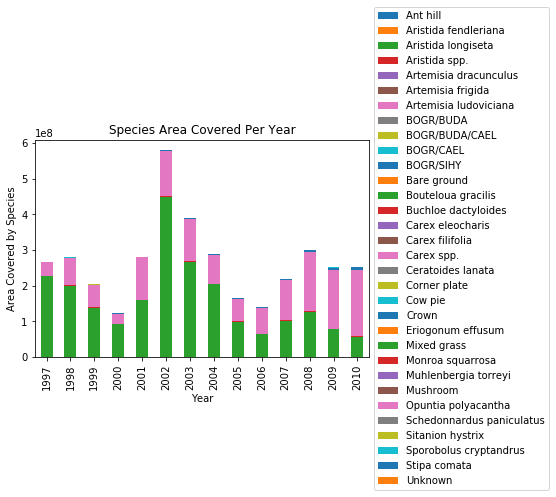

In [20]:
merplot = merged.groupby(['species','year'], 
                         as_index = False).cover.sum()
merplotwide = merplot.pivot(index = 'year', columns = 'species', 
                             values = 'cover')
q1 = merplotwide.plot(kind = 'bar', stacked = True, 
                  title = "Species Area Covered Per Year")
q1.set_xlabel("Year")
q1.set_ylabel("Area Covered by Species")
q1.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

##### We can see that the species that takes up the most area initially was Bouteloua Gracilis, but in the later years was taken over by Carex spp.

##### The next series of code plots the same area covered, but by growth form instead

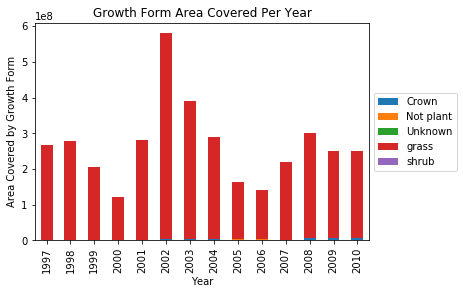

In [5]:
mer2plot = merged.groupby(['growthform','year'], 
                         as_index = False).cover.sum()
mer2plotwide = mer2plot.pivot(index = 'year', columns = 'growthform', 
                             values = 'cover')
q2 = mer2plotwide.plot(kind = 'bar', stacked = True, 
                  title = "Growth Form Area Covered Per Year")
q2.set_xlabel("Year")
q2.set_ylabel("Area Covered by Growth Form")
q2.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

##### From these results we can see that the majority of the area covered is by grass, which makes sense because the two most prominent species from the first analyses were both grasses.

##### The next analysis looks at precipitation data. First I merge the climate data with the main data frame

In [9]:
grpclimate = climate.groupby('year',as_index=False).precip.mean() #Gets mean for precipitation in each year
cmerged = pd.merge(left = merged, right = grpclimate, how = 'left',left_on = 'year', right_on = 'year')

##### Plots question 3, mean precipitation in a year versus area covered by growth form. I use subplots so one can visualize the trend for each growth form, as otherwise grass would dominate the plot. The trends show the same for all growth forms: more precipitation yields more area covered.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D709120C50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001D7096A8AC8>], dtype=object)

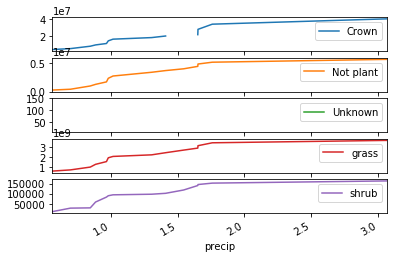

In [13]:
mer3plot = cmerged.groupby(['growthform','precip'], 
                         as_index = False).cover.sum()
mer3plotwide = mer3plot.pivot(index = 'precip', columns = 'growthform', 
                             values = 'cover')
q3 = mer3plotwide.cumsum()
q3.plot(subplots=True)

##### For the fourth question - I chose to plot density by growth form in each year.

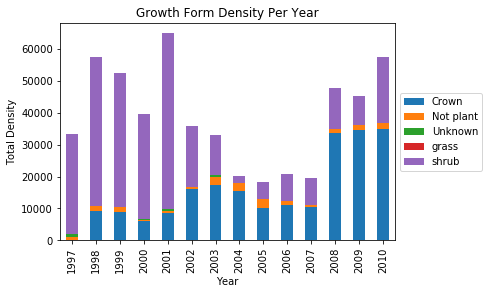

In [18]:
mer4plot = merged.groupby(['growthform','year'], 
                         as_index = False).density.sum()
mer4plotwide = mer4plot.pivot(index = 'year', columns = 'growthform', 
                             values = 'density')
q4 = mer4plotwide.plot(kind = 'bar', stacked = True, 
                  title = "Growth Form Density Per Year")
q4.set_xlabel("Year")
q4.set_ylabel("Total Density")
q4.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

##### While grass was king in terms of area covered, it has little to no density. In the early years, shrubs dominated most of the density, however over time, crowns took over and became the most dense growth form.